In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [60]:
# Read in dataset
df = pd.read_csv("https://raw.githubusercontent.com/JosephLazarus/QTW/main/Case%20Study%202/Data/diabetic_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## EDA

In [61]:
df.shape

(101766, 50)

In [62]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [63]:
df_object = df.select_dtypes(include=['object_'])
df_object.describe().transpose()

,count,unique,top,freq
race,101766,6,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,101766,10,?,98569
payer_code,101766,18,?,40256
medical_specialty,101766,73,?,49949
diag_1,101766,717,428,6862
diag_2,101766,749,276,6752
diag_3,101766,790,250,11555
max_glu_serum,101766,4,None,96420


The dataset has a total of 101,766 records with 49 variables with the target variables named 'readmitted'.  Two of those 49 variables are identifiers.

Use the code below to see unique values with their count in each column.
*The team commented the code out because long length of the output.* 

In [64]:
# for col in df:
#     print(col)
#     print(df[col].value_counts())

### Missing Values and Data Imputations
Seems like all missing values have been coded as '?'.  Let's replace all '?' with Nan then count missing value in all columns.

In [65]:
# Replace '?' with Nan
df_na = df.replace('?', np.NAN)

# Count missing values
df_na = pd.DataFrame(df_na.isna().sum())
df_na.rename(columns={df_na.columns[0]: 'count'}, inplace = True)

df_na = df_na[df_na['count'] != 0]
df_na['percent_missing'] = df_na['count']/df.shape[0]
df_na = df_na.sort_values('count', ascending=False)

df_na

,count,percent_missing
weight,98569,0.968585
medical_specialty,49949,0.490822
payer_code,40256,0.395574
race,2273,0.022336
diag_3,1423,0.013983
diag_2,358,0.003518
diag_1,21,0.000206


Seven variables have missing values as shown in the table above.
- **weight** has 98,569 missing values, which equal to about 97% missing.
- **medical_specialty** has about 49% missing values.
- **payer_code** has about 40% missing value.
- **race** and **diag_3** have alittle above 2% and 1% missing values, respectively.
- **diag_2** and **diag_1** have less than 1% missing values. 

Run Pearson Correlations to see if other columns have stronf correlation with these 7 variables and can be helpful to fill in missing values.

In [66]:
df_corr = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
df_corr = df_corr[['weight', 'medical_specialty', 'payer_code', 'race', 'diag_3', 'diag_2', 'diag_1']]
df_corr = df_corr.abs()
df_corr.style.background_gradient(cmap='Blues')

,weight,medical_specialty,payer_code,race,diag_3,diag_2,diag_1
encounter_id,0.009245,0.027783,0.369888,0.014384,0.068818,0.109559,0.040542
patient_nbr,0.003434,0.032837,0.364582,0.006063,0.070654,0.111112,0.049124
race,0.038383,0.005853,0.028756,1.000000,0.003692,0.010238,0.021964
gender,0.010623,0.015654,0.034695,0.019468,0.016728,0.008582,0.015452
age,0.007005,0.044949,0.180412,0.124544,0.058892,0.062124,0.059875
weight,1.000000,0.039064,0.032643,0.038383,0.020492,0.033069,0.002570
admission_type_id,0.030567,0.184927,0.044007,0.045265,0.011195,0.015855,0.031661
discharge_disposition_id,0.028147,0.020098,0.090389,0.016293,0.006814,0.003328,0.012349
admission_source_id,0.036410,0.077935,0.124068,0.015765,0.008837,0.028280,0.012770
time_in_hospital,0.019221,0.003033,0.058149,0.009216,0.017085,0.023193,0.005387


#### **weight**
From the correlation table above, **weight** does not seem to have strong correlation with any other columns.  With 97% missing values, we decided to drop weight variable from the dataset due to unreliability. 

#### **medical_specialty**
**medical_specialty** has the strongest correlation with admission_type_id.  Let's look at the correlation between each value of **medical_specialty** with admission_type_is to see if admission_type_id can be helpful for missing value imputating for the column.

<AxesSubplot:>

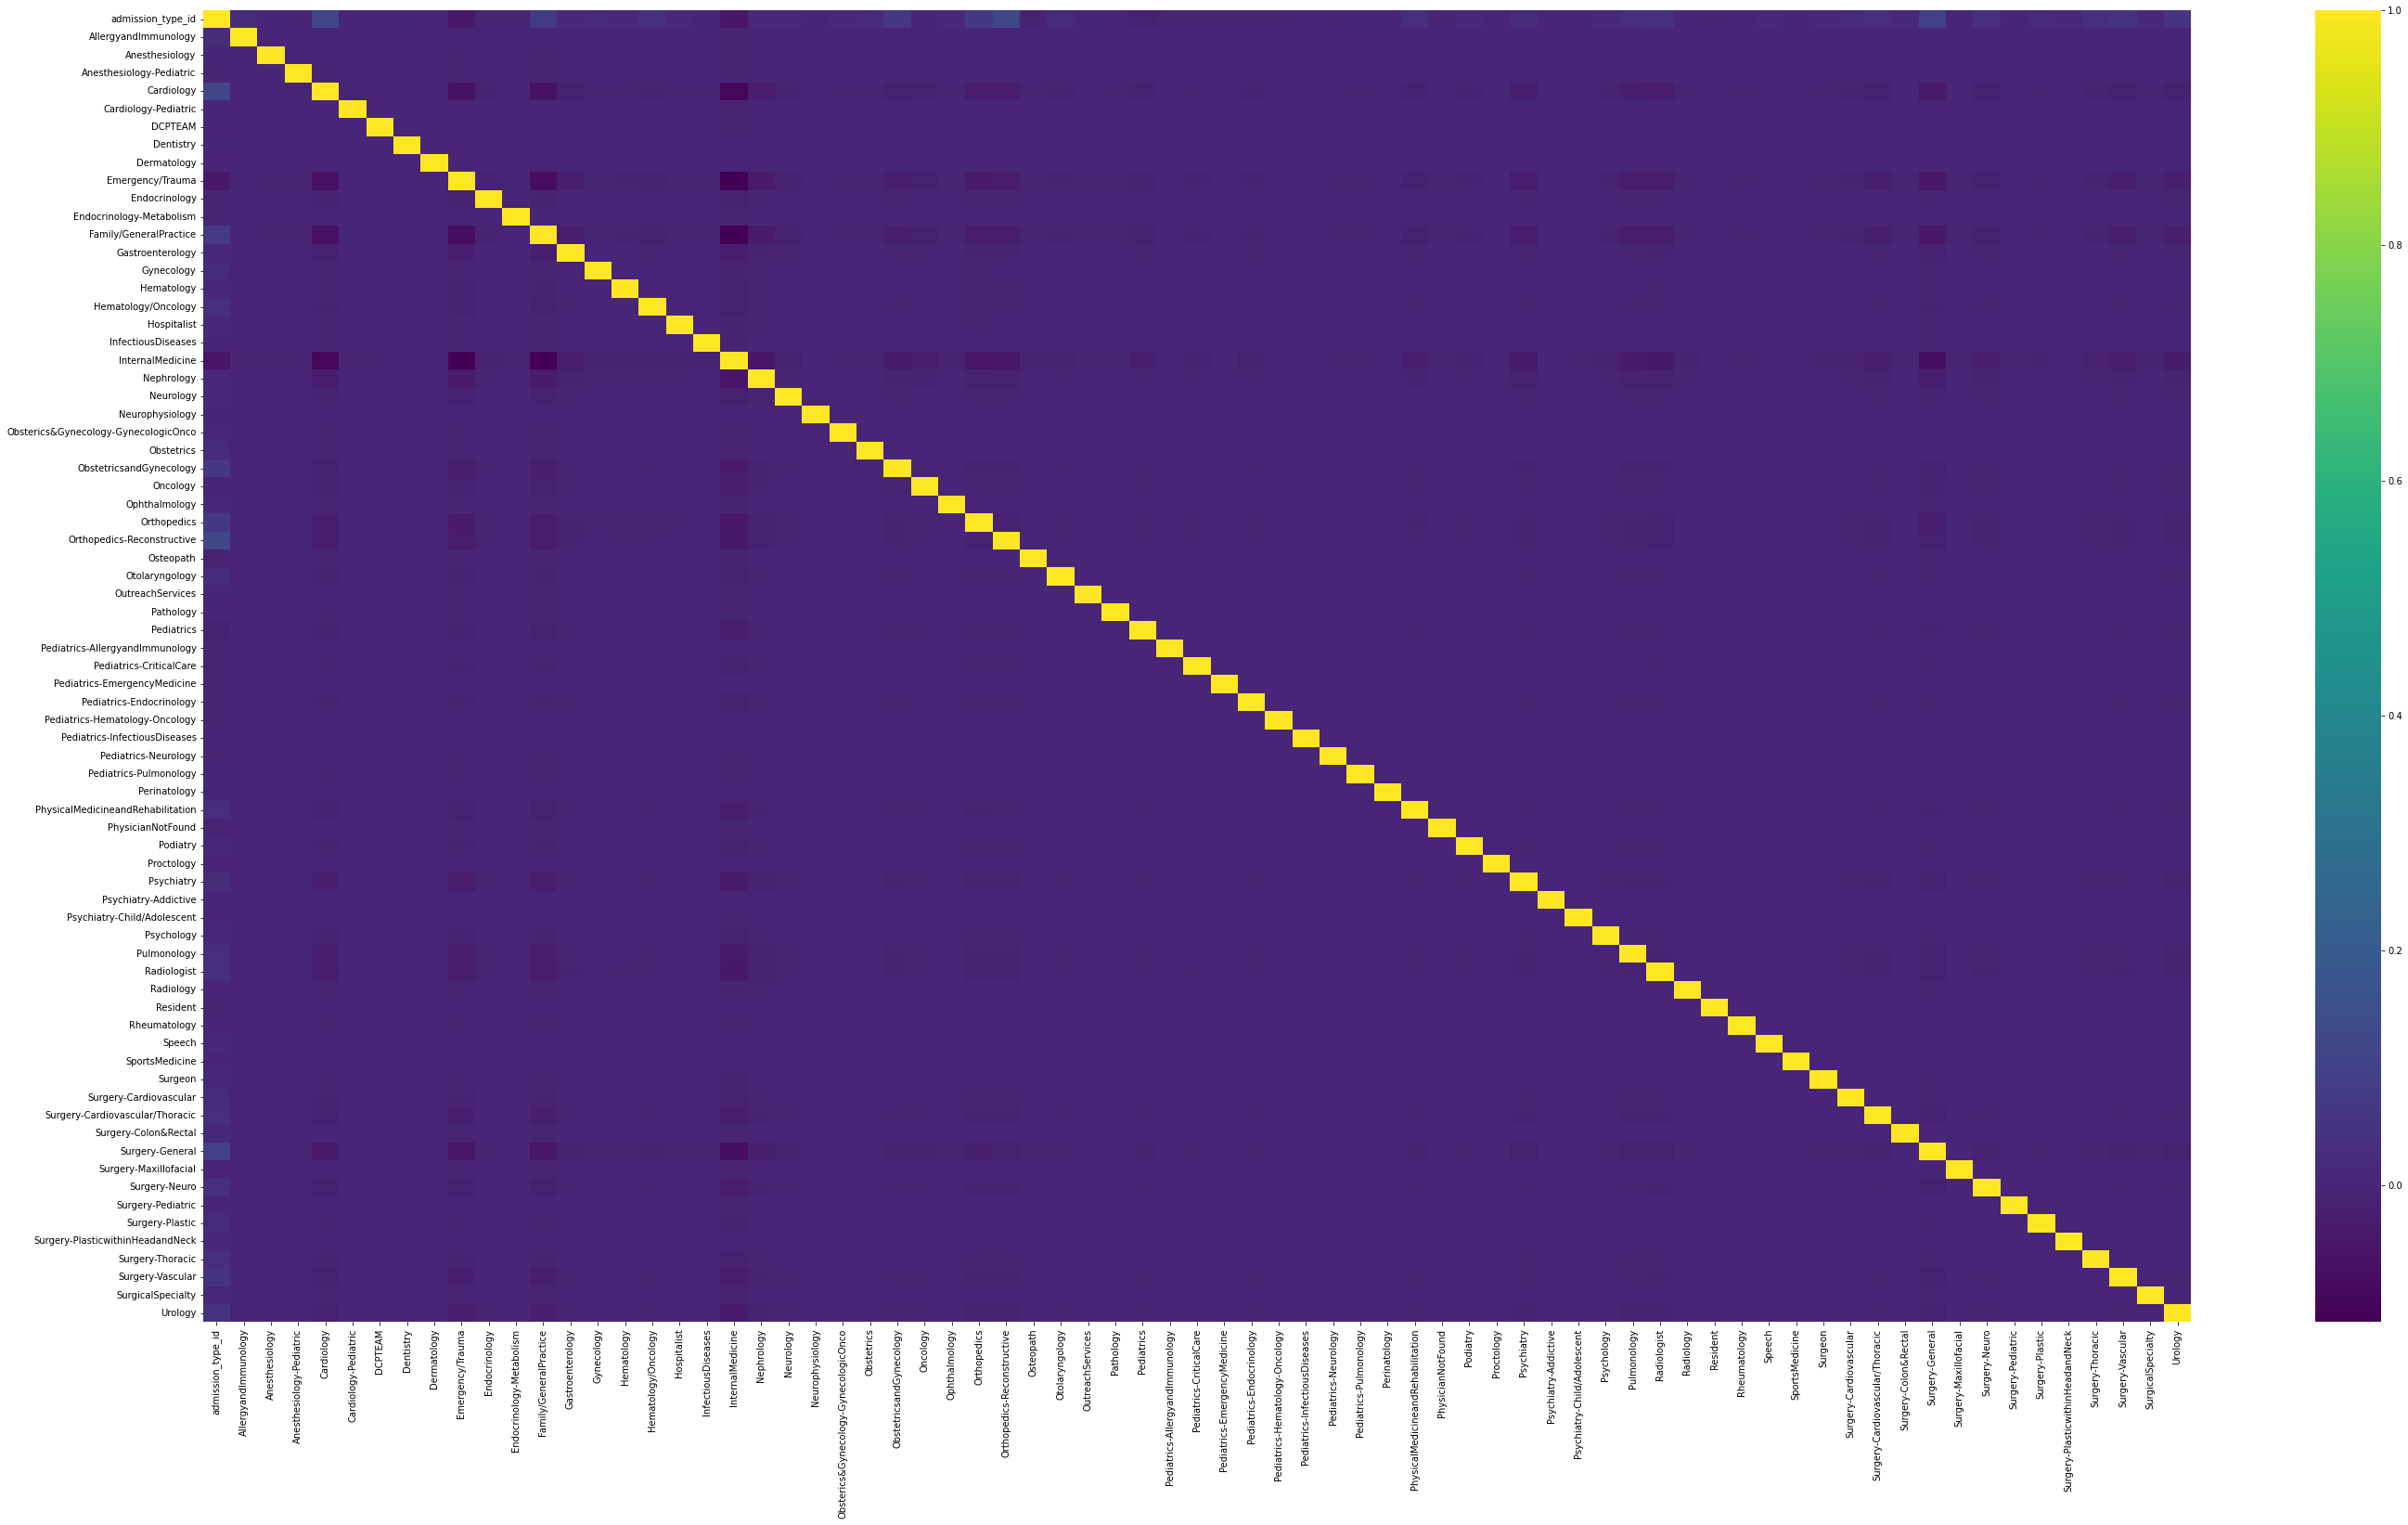

In [73]:
med_spec = df[['medical_specialty', 'admission_type_id']]

# using pd get dummies for the category columns we are keeping
dummies = pd.get_dummies(med_spec['medical_specialty'],drop_first=True)

#dropping original columns
med_spec_df = med_spec.drop('medical_specialty',axis=1)

#concating dummies to the data frame
med_spec_df = pd.concat([med_spec_df, dummies],axis=1)

plt.figure(figsize=(48,26))
sns.heatmap(med_spec_df.corr(), annot=False, cmap='viridis')

With all 73 different values (including missing value) within **medical_specialty**, there is no stong correlation with admission_type_id.  The team decided to fill the **medical_specialty** with 'missing' to preserve the existing values.

#### **payer_code**

First, let look at the count for all exists values in the column.

In [88]:
print(df['payer_code'].value_counts())

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64


Without considering encounter_id and patient_nbr, which are unique identifiers for each patient, **payer_code** has the strongest correlation at 0.180 with age. Let's look at the correlation between each value of **payer_code** with age to see if age can be helpful for missing value imputating for the column.

<AxesSubplot:xlabel='age', ylabel='payer_code'>

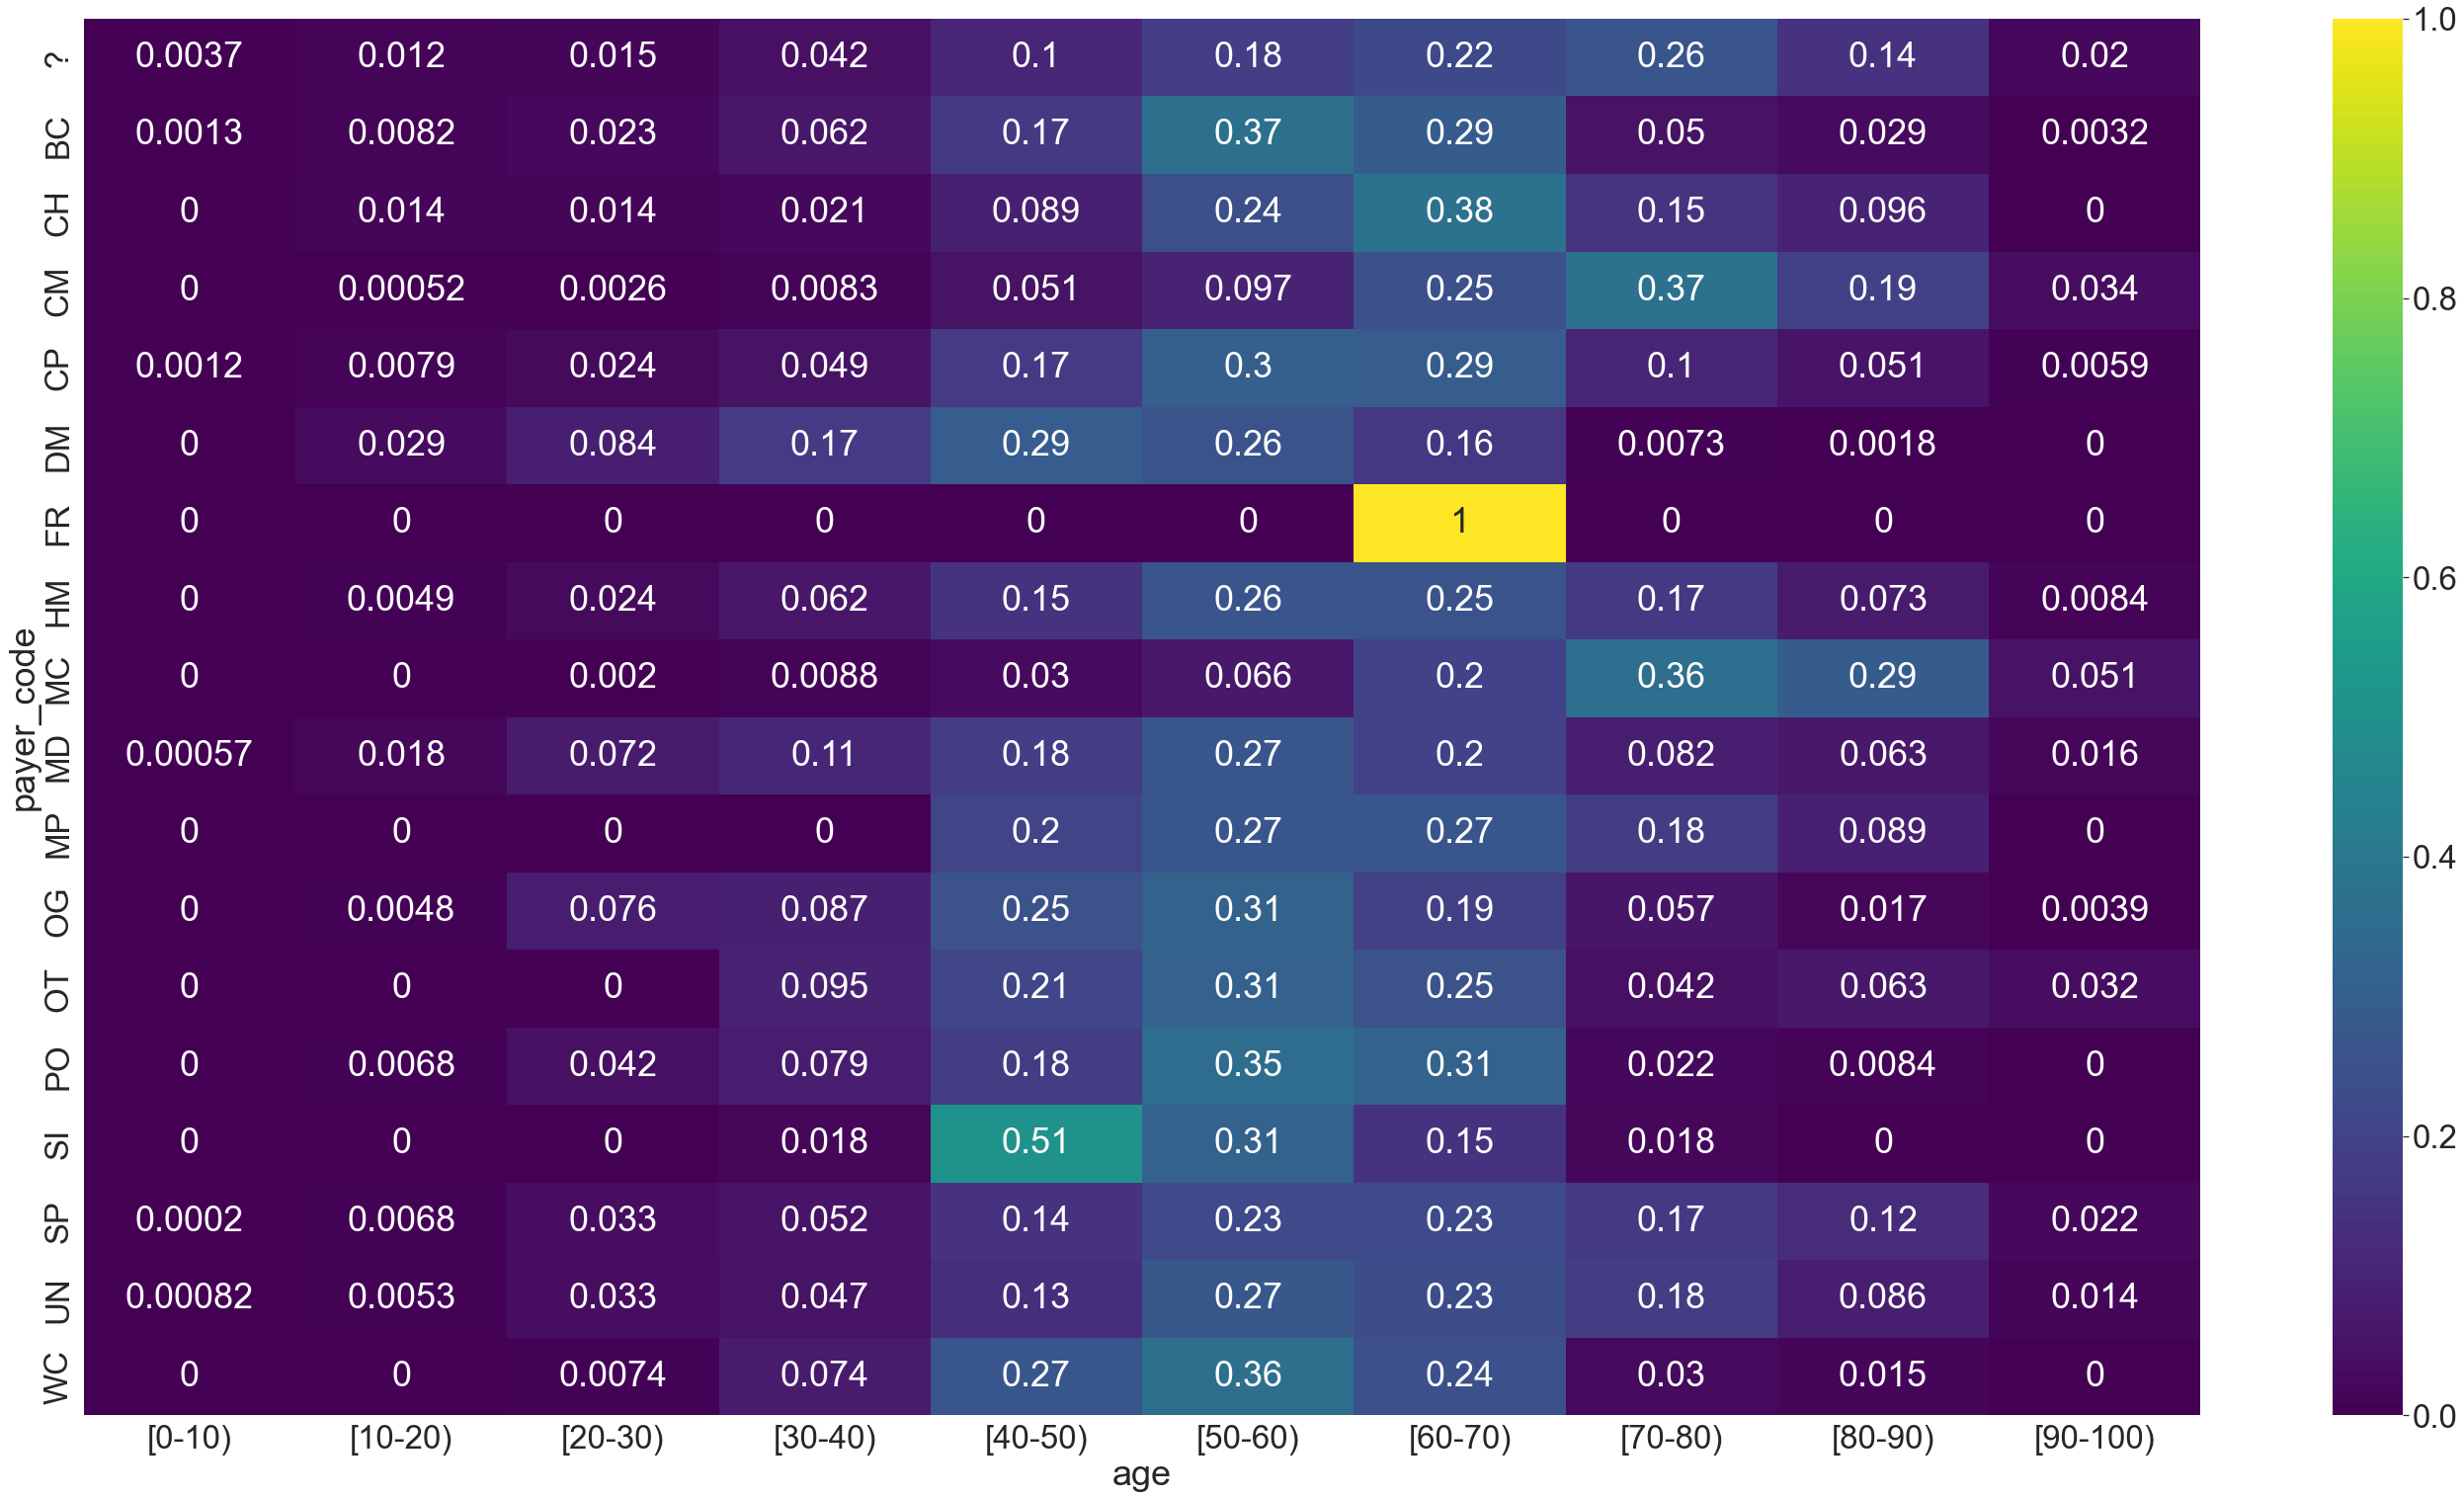

In [84]:
payer_code_vs_age = pd.DataFrame(pd.crosstab(df['payer_code'], df['age'], normalize='index'))

plt.figure(figsize=(48,26))
sns.set(font_scale=3)
sns.heatmap(payer_code_vs_age,annot=True,cmap='viridis')

There is no strong correlation relationship between each value of **payer_code** and age.  It will not be reasonable to use age to help imputing the missing values for the column.

To impute the missing value with the most occurance count which is 'MC' is also not reasonable.  There is 32,439 'MC' appears in the columns which is less than the missing values of 40,256.

The team decided to fill the **payer_code** with 'missing' to preserve the existing values.

#### **race**

First, let's look at the count for each value in the column.

In [89]:
print(df['race'].value_counts())

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


Evenif, **race** has the strongest correlation at 0.125 with age, the missing values for **race** are not disproportionately from range of age, or even other category value.

The team decided to fill in the **race** NaN's with a new category of 'Not identify'.

In [ ]:
df_impute.race = df_impute.race.fillna("missing")

<AxesSubplot:xlabel='admission_source_id', ylabel='payer_code'>

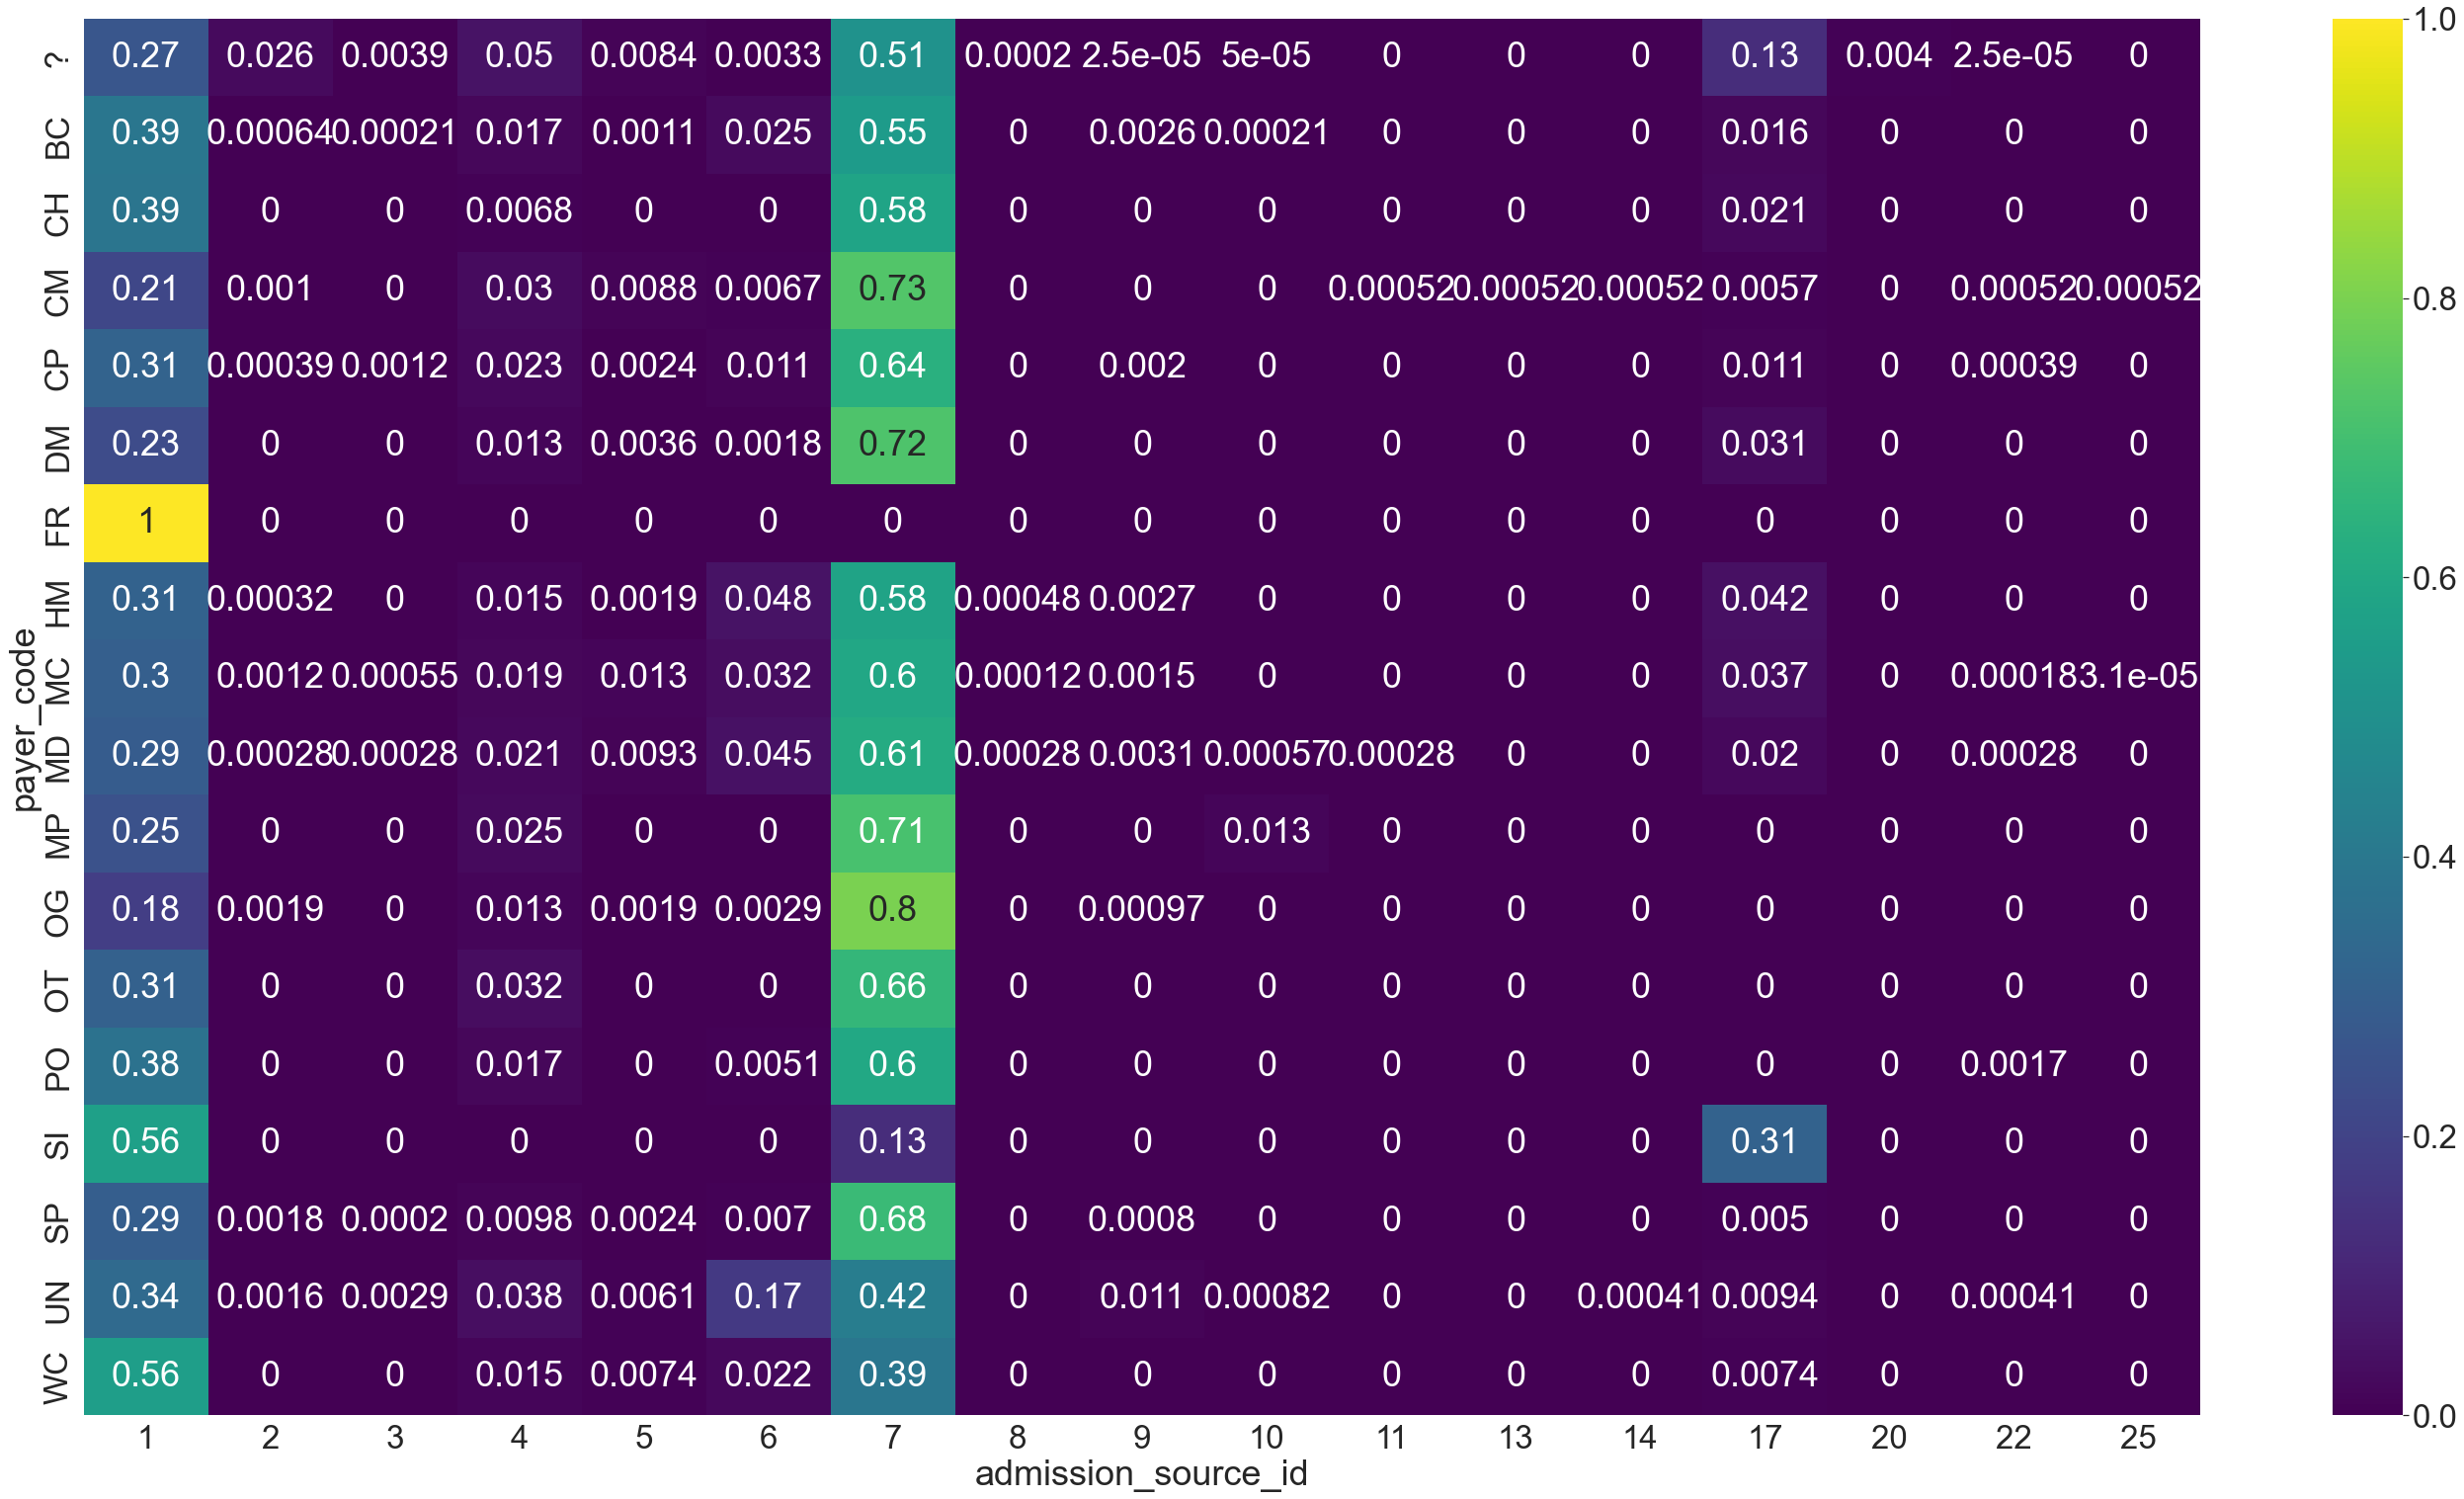

In [85]:
payer_vs_adsourceid = pd.DataFrame(pd.crosstab(df['payer_code'], df['admission_source_id'], normalize='index'))

plt.figure(figsize=(48,26))
sns.set(font_scale=3)
sns.heatmap(payer_vs_adsourceid,annot=True,cmap='viridis')

<AxesSubplot:xlabel='admission_source_id', ylabel='age'>

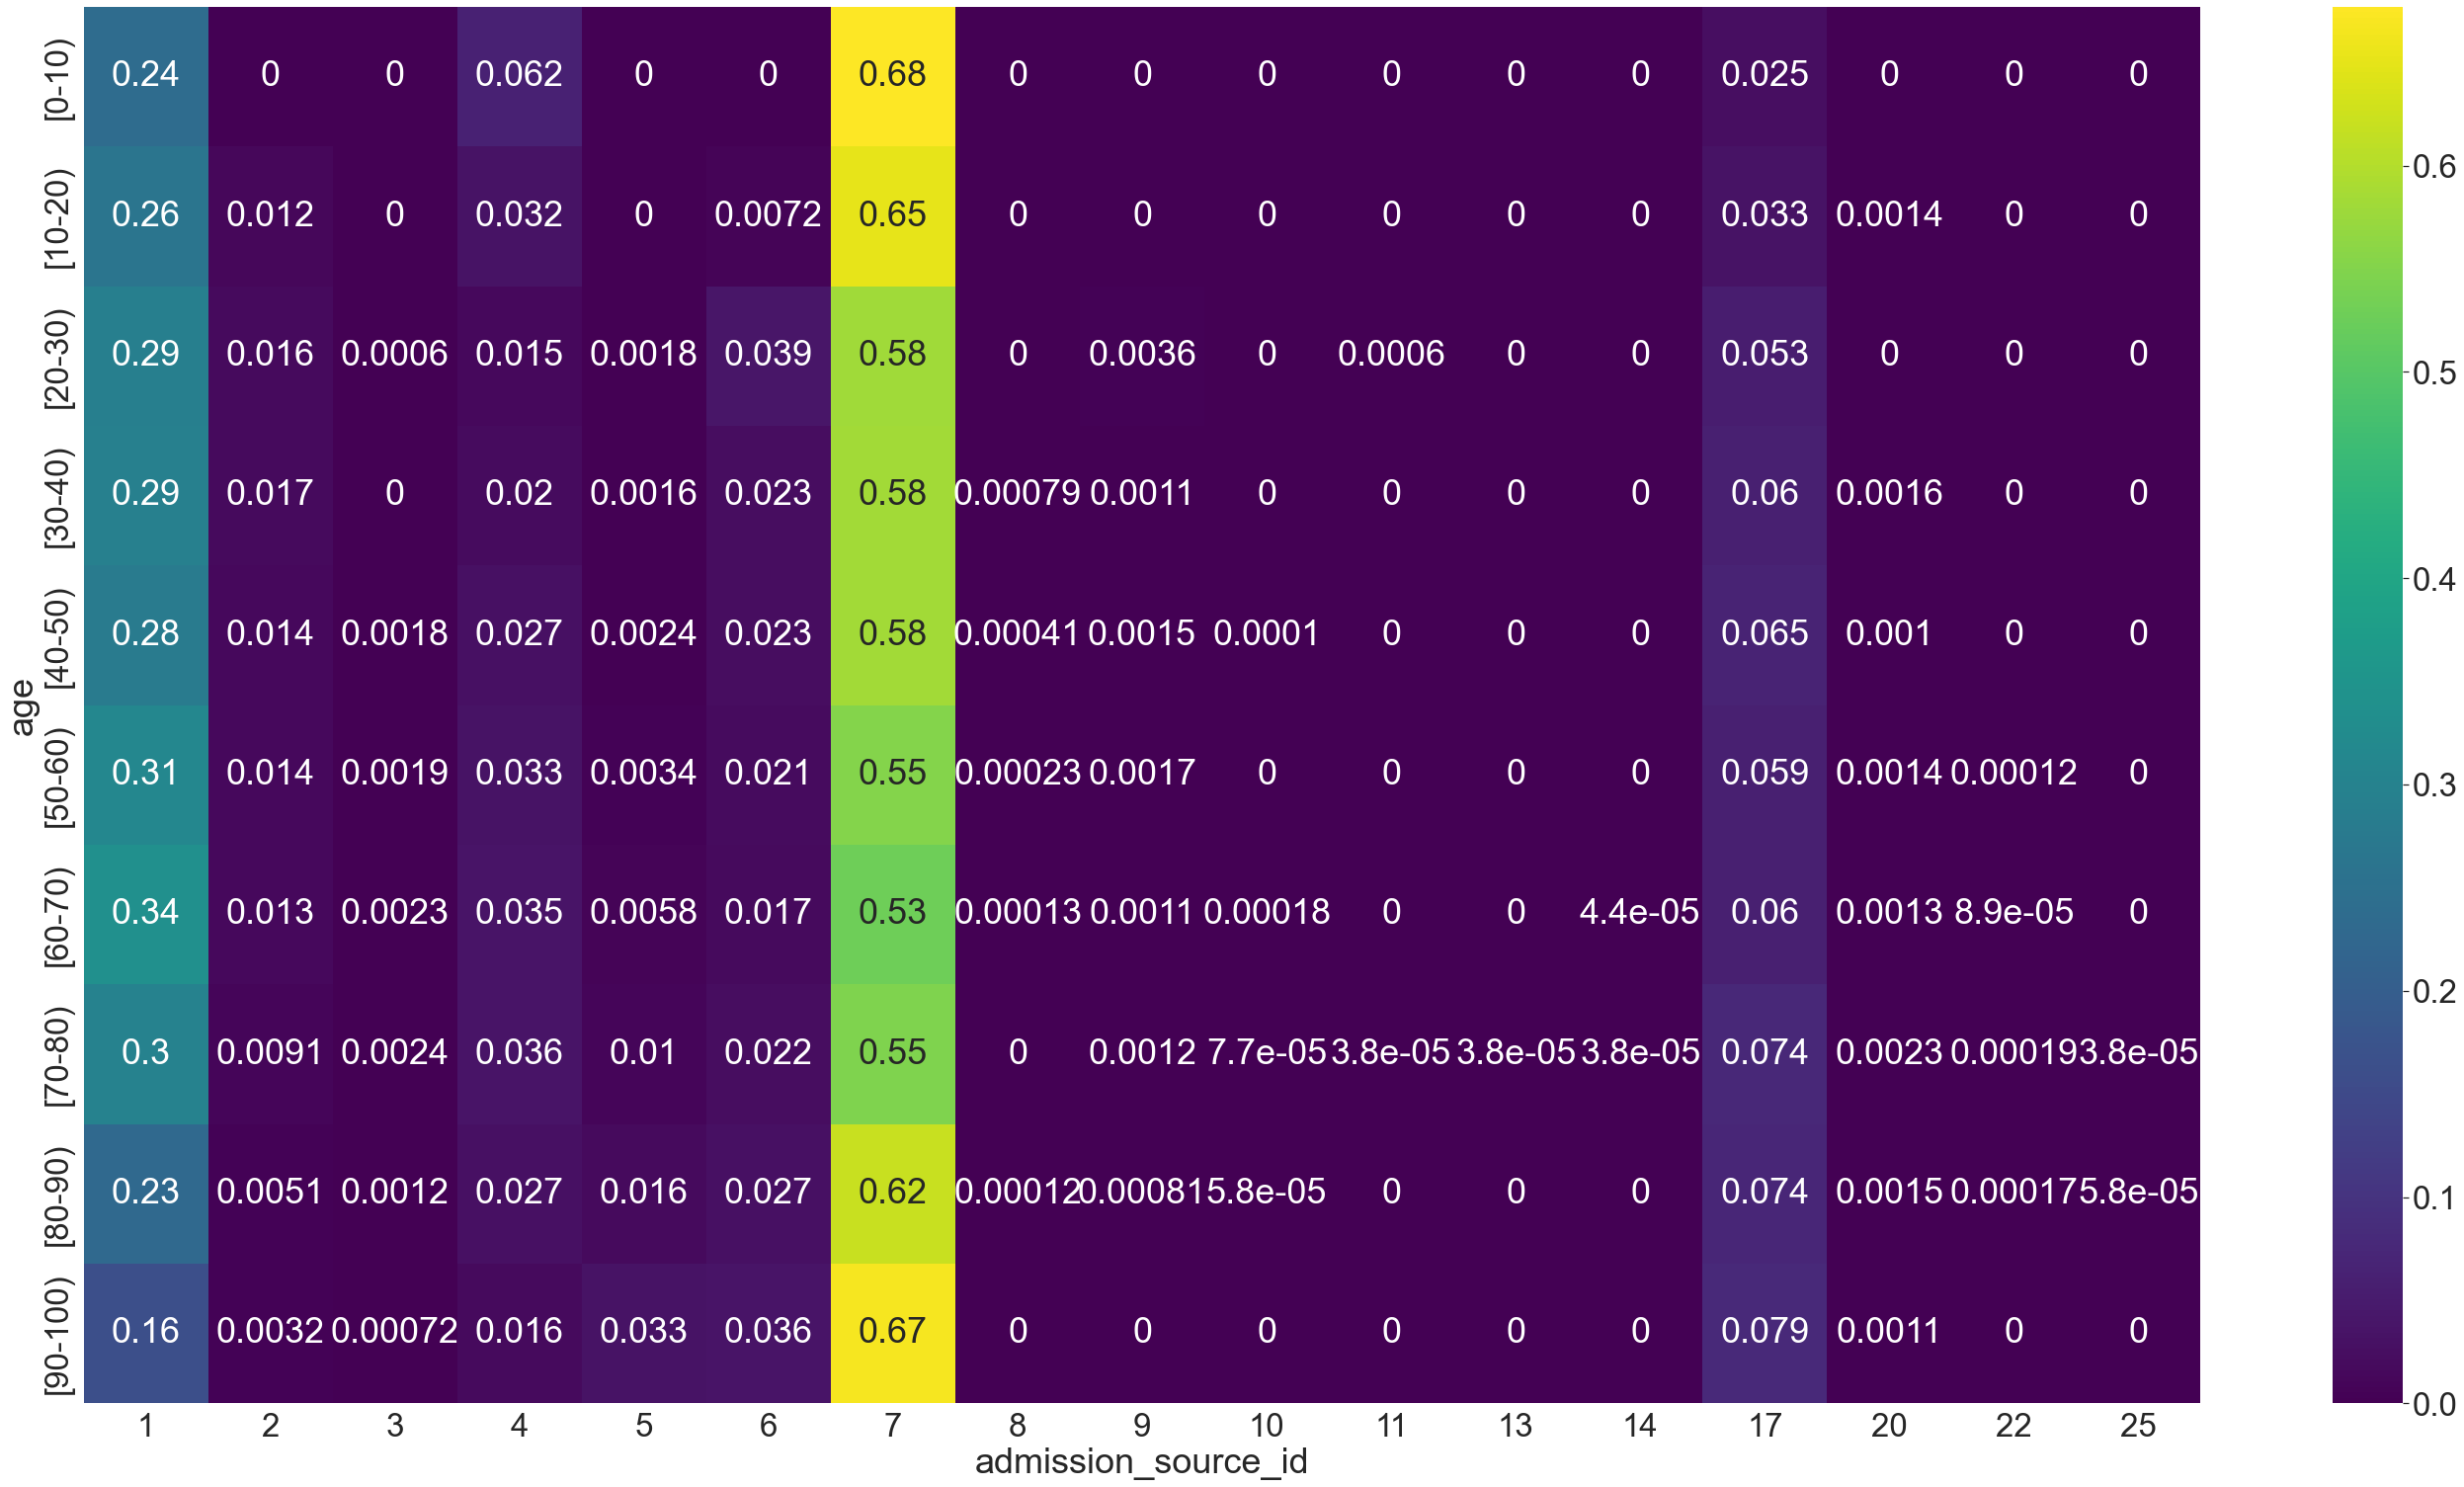

In [86]:
payer_vs_adsourceid = pd.DataFrame(pd.crosstab(df['age'], df['admission_source_id'], normalize='index'))

plt.figure(figsize=(48,26))
sns.set(font_scale=3)
sns.heatmap(payer_vs_adsourceid,annot=True,cmap='viridis')